In [9]:
import pandas as pd
from scipy.stats import kruskal

file_path = "../../Data_CSV/128/avg_csv/avg_csv.csv" 
data = pd.read_csv(file_path)

data['byte_size_group'] = pd.cut(
    data['byte_size'], 
    bins=[0, 64, 160, float('inf')], 
    labels=['small', 'medium', 'large']
)

dependent_variables = ['flash_usage', 'memory_usage', 
                       'encryption_time', 'decryption_time', 
                       'encryption_power', 'decryption_power']

for variable in dependent_variables:
    groups = [group[variable].values for name, group in data.groupby('byte_size_group')]
    stat, p_value = kruskal(*groups)
    
    print(f"Uji Kruskal-Wallis untuk {variable}:")
    print(f"Statistik H = {stat:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("Hasilnya signifikan secara statistik. Terdapat perbedaan antara kelompok.\n")
    else:
        print("Hasilnya tidak signifikan secara statistik. Tidak terdapat perbedaan antara kelompok.\n")


Uji Kruskal-Wallis untuk flash_usage:
Statistik H = 5.3515, p-value = 0.0689
Hasilnya tidak signifikan secara statistik. Tidak terdapat perbedaan antara kelompok.

Uji Kruskal-Wallis untuk memory_usage:
Statistik H = 14.7368, p-value = 0.0006
Hasilnya signifikan secara statistik. Terdapat perbedaan antara kelompok.

Uji Kruskal-Wallis untuk encryption_time:
Statistik H = 14.7368, p-value = 0.0006
Hasilnya signifikan secara statistik. Terdapat perbedaan antara kelompok.

Uji Kruskal-Wallis untuk decryption_time:
Statistik H = 14.7368, p-value = 0.0006
Hasilnya signifikan secara statistik. Terdapat perbedaan antara kelompok.

Uji Kruskal-Wallis untuk encryption_power:
Statistik H = 4.0037, p-value = 0.1351
Hasilnya tidak signifikan secara statistik. Tidak terdapat perbedaan antara kelompok.

Uji Kruskal-Wallis untuk decryption_power:
Statistik H = 0.1821, p-value = 0.9130
Hasilnya tidak signifikan secara statistik. Tidak terdapat perbedaan antara kelompok.



C:\Users\nandi\AppData\Local\Temp\ipykernel_53252\4083203359.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[variable].values for name, group in data.groupby('byte_size_group')]


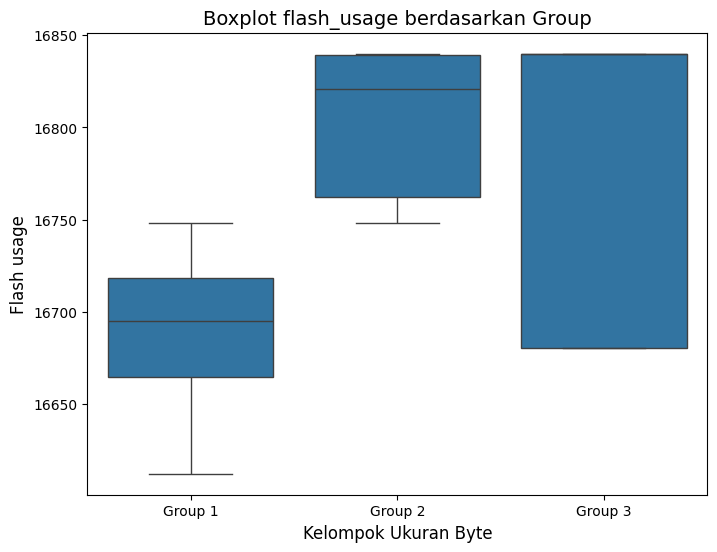

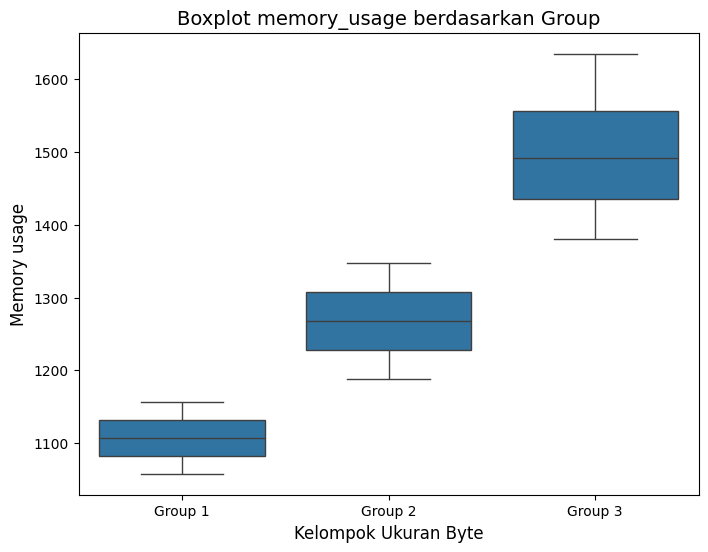

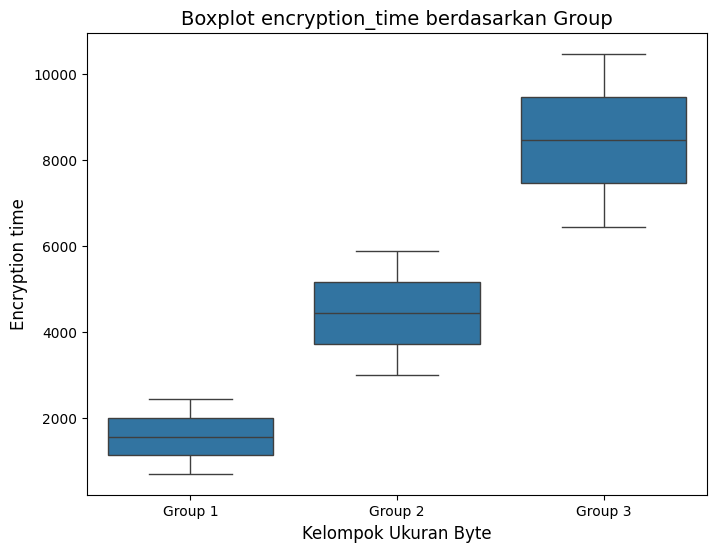

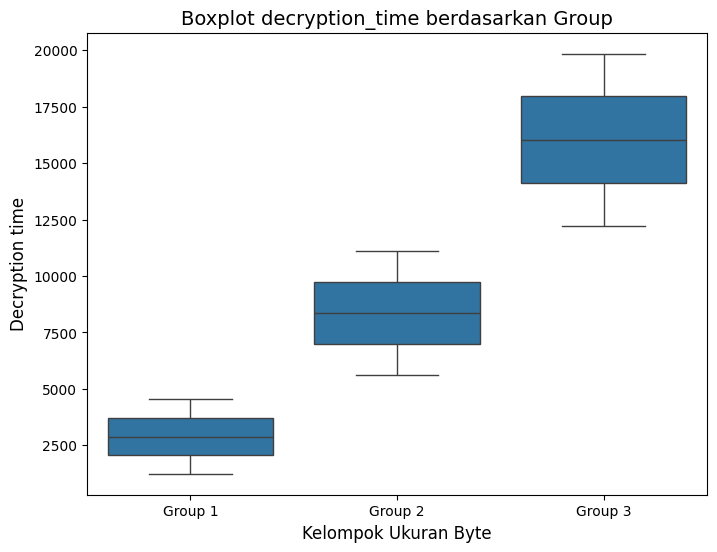

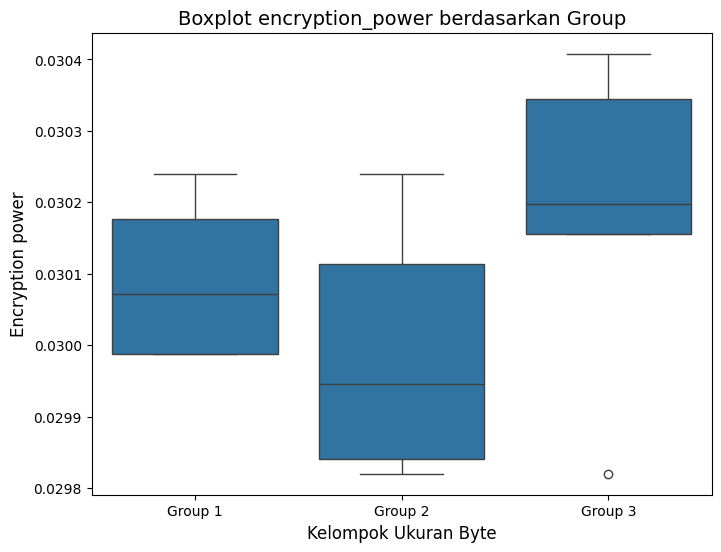

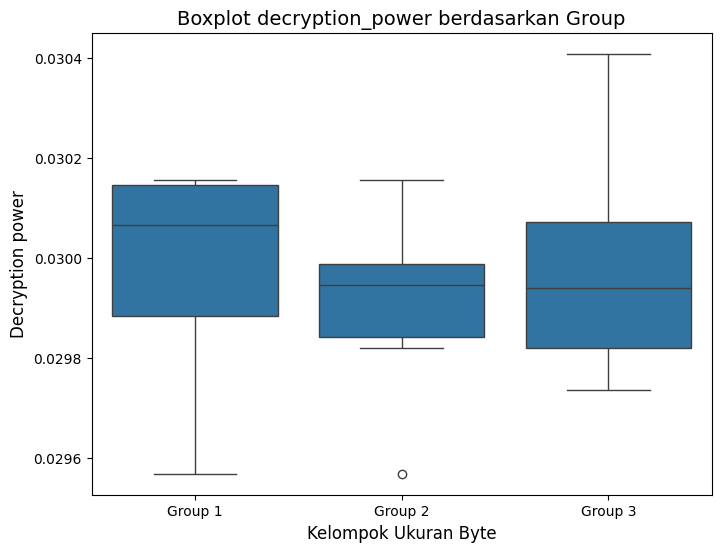

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca data file CSV
file_path = "../../Data_CSV/128/avg_csv/avg_csv.csv"
data = pd.read_csv(file_path)

# Menentukan kelompok berdasarkan byte_size
data['byte_size_group'] = pd.cut(
    data['byte_size'], 
    bins=[0, 64, 160, float('inf')], 
    labels=['Group 1', 'Group 2', 'Group 3']
)

# Variabel dependen yang akan divisualisasikan
dependent_variables = ['flash_usage', 'memory_usage', 
                       'encryption_time', 'decryption_time', 
                       'encryption_power', 'decryption_power']

# Membuat boxplot untuk setiap variabel dependen
for var in dependent_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='byte_size_group', y=var, data=data)
    plt.title(f'Boxplot {var} berdasarkan Group', fontsize=14)
    plt.xlabel('Kelompok Ukuran Byte', fontsize=12)
    plt.ylabel(var.replace('_', ' ').capitalize(), fontsize=12)
    plt.show()
